<a href="https://colab.research.google.com/github/sappy04/EDA/blob/main/22BCE2178.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load the dataset
url = "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/1000%20Sales%20Records.csv"
df = pd.read_csv(url)

print("Columns in the DataFrame:")
print(df.columns.tolist())

df.columns = df.columns.str.strip().str.lower()
print("Cleaned Columns:", df.columns.tolist())

Columns in the DataFrame:
['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority', 'Order Date', 'Order ID', 'Ship Date', 'Units Sold', 'Unit Price', 'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit']
Cleaned Columns: ['region', 'country', 'item type', 'sales channel', 'order priority', 'order date', 'order id', 'ship date', 'units sold', 'unit price', 'unit cost', 'total revenue', 'total cost', 'total profit']


In [11]:
# Step 3: Explore the dataset
# Check dimensions
print("Dataset Dimensions:")
print(df.shape)


# Display the first few rows
print("\nFirst 5 Rows:")
print(df.head())

Dataset Dimensions:
(1000, 14)

First 5 Rows:
                         Region Country   Item Type Sales Channel  \
0  Middle East and North Africa   Libya   Cosmetics       Offline   
1                 North America  Canada  Vegetables        Online   
2  Middle East and North Africa   Libya   Baby Food       Offline   
3                          Asia   Japan      Cereal       Offline   
4            Sub-Saharan Africa    Chad      Fruits       Offline   

  Order Priority  Order Date   Order ID   Ship Date  Units Sold  Unit Price  \
0              M  10/18/2014  686800706  10/31/2014        8446      437.20   
1              M   11/7/2011  185941302   12/8/2011        3018      154.06   
2              C  10/31/2016  246222341   12/9/2016        1517      255.28   
3              C   4/10/2010  161442649   5/12/2010        3322      205.70   
4              H   8/16/2011  645713555   8/31/2011        9845        9.33   

   Unit Cost  Total Revenue  Total Cost  Total Profit  
0     26

In [13]:
# Summary of the dataset
print("\nSummary:")
print(df.info())


Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          1000 non-null   object 
 1   Country         1000 non-null   object 
 2   Item Type       1000 non-null   object 
 3   Sales Channel   1000 non-null   object 
 4   Order Priority  1000 non-null   object 
 5   Order Date      1000 non-null   object 
 6   Order ID        1000 non-null   int64  
 7   Ship Date       1000 non-null   object 
 8   Units Sold      1000 non-null   int64  
 9   Unit Price      1000 non-null   float64
 10  Unit Cost       1000 non-null   float64
 11  Total Revenue   1000 non-null   float64
 12  Total Cost      1000 non-null   float64
 13  Total Profit    1000 non-null   float64
dtypes: float64(5), int64(2), object(7)
memory usage: 109.5+ KB
None


In [14]:
# Descriptive statistics
print("\nDescriptive Statistics:")
print(df.describe())


Descriptive Statistics:
           Order ID   Units Sold  Unit Price    Unit Cost  Total Revenue  \
count  1.000000e+03  1000.000000  1000.00000  1000.000000   1.000000e+03   
mean   5.496813e+08  5053.988000   262.10684   184.965110   1.327322e+06   
std    2.571334e+08  2901.375317   216.02106   175.289311   1.486515e+06   
min    1.029280e+08    13.000000     9.33000     6.920000   2.043250e+03   
25%    3.280740e+08  2420.250000    81.73000    56.670000   2.811919e+05   
50%    5.566097e+08  5184.000000   154.06000    97.440000   7.549392e+05   
75%    7.696945e+08  7536.750000   421.89000   263.330000   1.733503e+06   
max    9.955298e+08  9998.000000   668.27000   524.960000   6.617210e+06   

         Total Cost  Total Profit  
count  1.000000e+03  1.000000e+03  
mean   9.361192e+05  3.912026e+05  
std    1.162571e+06  3.836402e+05  
min    1.416750e+03  5.326100e+02  
25%    1.649319e+05  9.837612e+04  
50%    4.647261e+05  2.772260e+05  
75%    1.141750e+06  5.484568e+05  
ma

In [15]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Region            0
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Order Date        0
Order ID          0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
dtype: int64


In [21]:
# Step 4: Data Transformation Techniques
# Data Deduplication: Remove duplicate rows
df = df.drop_duplicates()
print("\nDataset Dimensions After Deduplication:")
print(df.shape)


Dataset Dimensions After Deduplication:
(1000, 14)


In [23]:
# Replacing Values: Replace specific values in a column
# Example: Replace 'Low' with 'L' in the 'Order Priority' column
df['Order Priority'] = df['Order Priority'].replace({'L': 'Low', 'H': 'High', 'C': 'Critical', 'M': 'Medium'})
print("\nUnique Values in Order Priority After Replacement:")
print(df['Order Priority'].unique())

# Discretization and Binning: Convert continuous data into discrete bins
# Example: Bin 'Unit Price' into 3 categories: Low, Medium, High
df['Unit Price Bin'] = pd.cut(df['Unit Price'], bins=3, labels=['Low', 'Medium', 'High'])
print("\nUnit Price Binning:")
print(df[['Unit Price', 'Unit Price Bin']].head())


Unique Values in Order Priority After Replacement:
['Medium' 'Critical' 'High' 'Low']

Unit Price Binning:
            Unit Price Unit Price Bin
Order Date                           
2014-10-18      437.20         Medium
2011-11-07      154.06            Low
2016-10-31      255.28         Medium
2010-04-10      205.70            Low
2011-08-16        9.33            Low


In [25]:
# Step 5: Handling Missing Data
# Traditional Methods: Fill missing values with mean, median, or mode
# Example: Fill missing values in 'Unit Price' with the mean
df['Unit Price'] = df['Unit Price'].fillna(df['Unit Price'].mean())

# Maximum Likelihood Estimation (MLE): Use advanced techniques for missing data
# (This requires statistical libraries like `statsmodels` or `sklearn`)
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imputer = IterativeImputer(max_iter=10, random_state=42)
df[['Unit Price', 'Unit Cost']] = imputer.fit_transform(df[['Unit Price', 'Unit Cost']])

print("\nMissing Values After Handling:")
print(df.isnull().sum())


Missing Values After Handling:
Region            0
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Order ID          0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
Unit Price Bin    0
dtype: int64


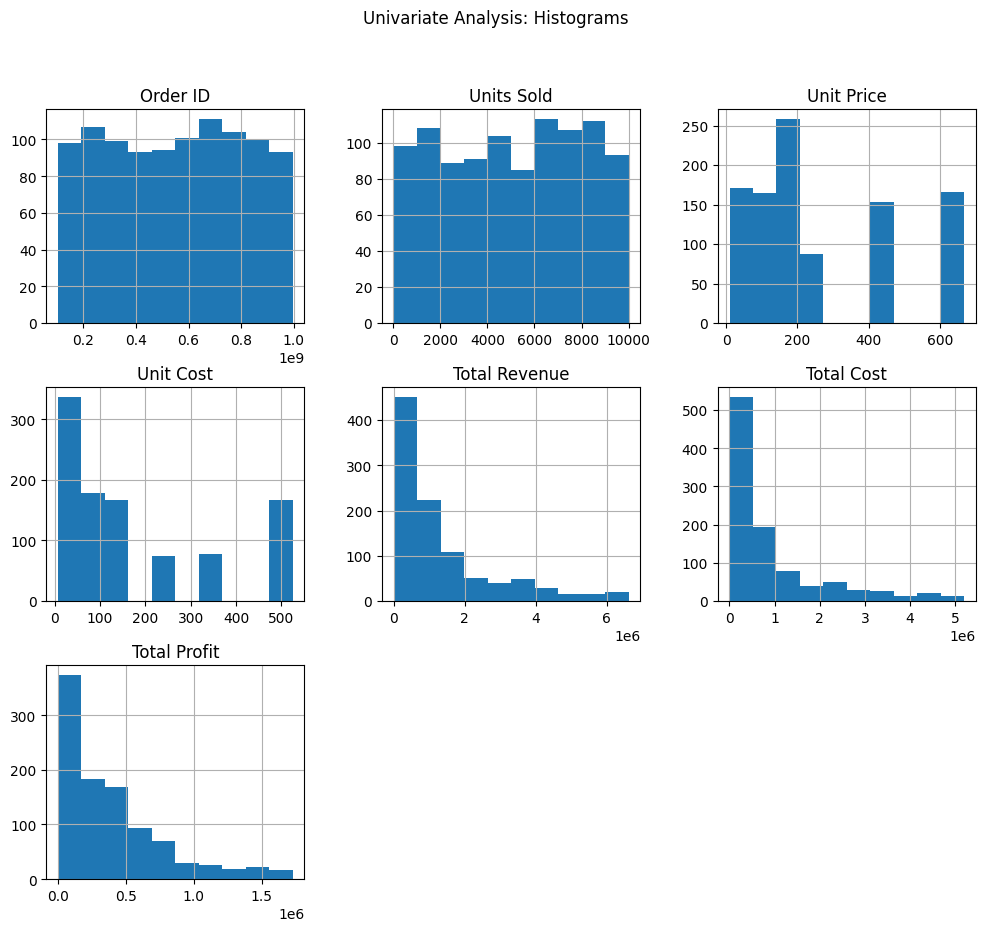

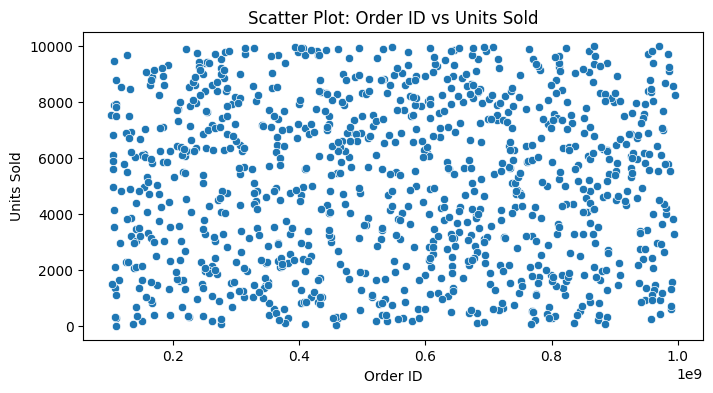

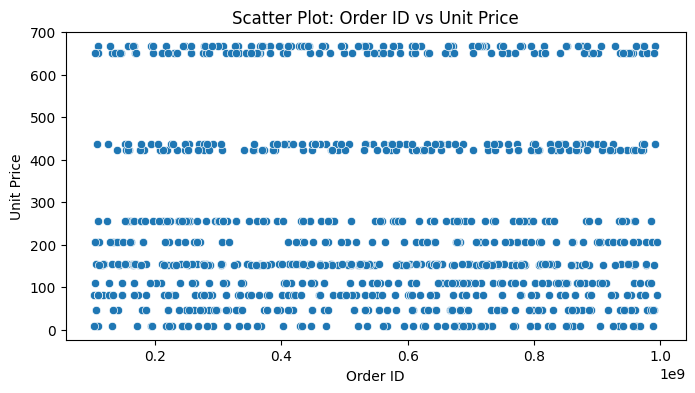

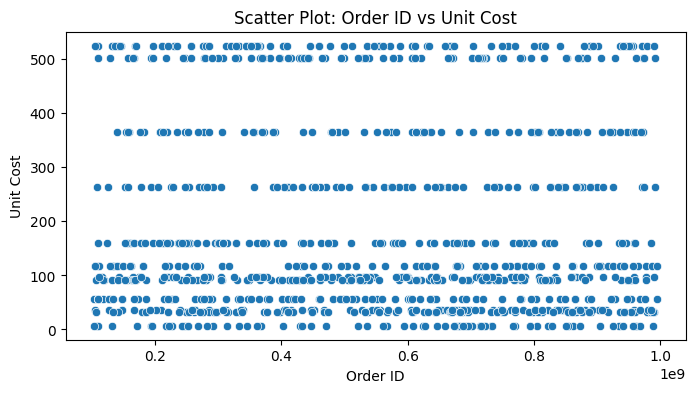

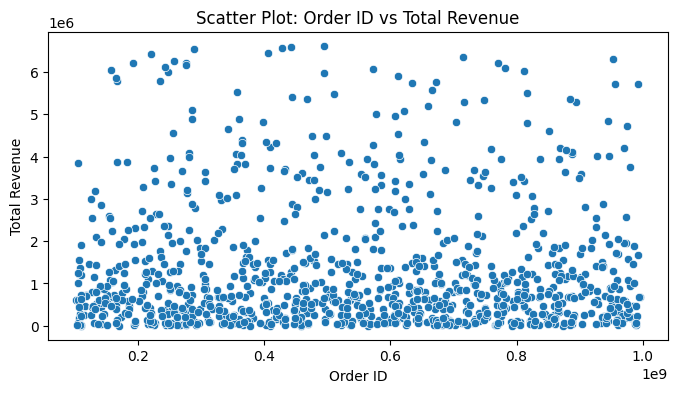

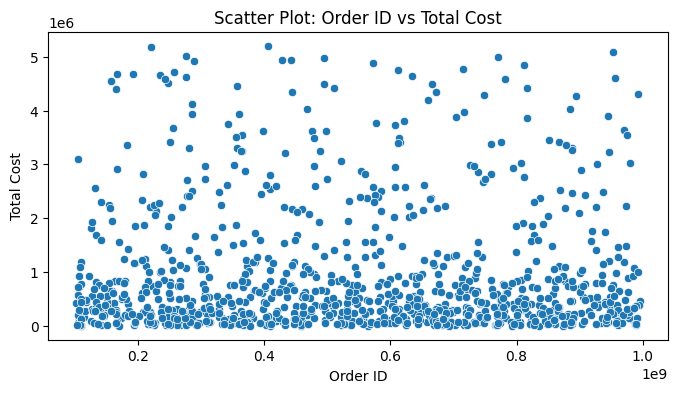

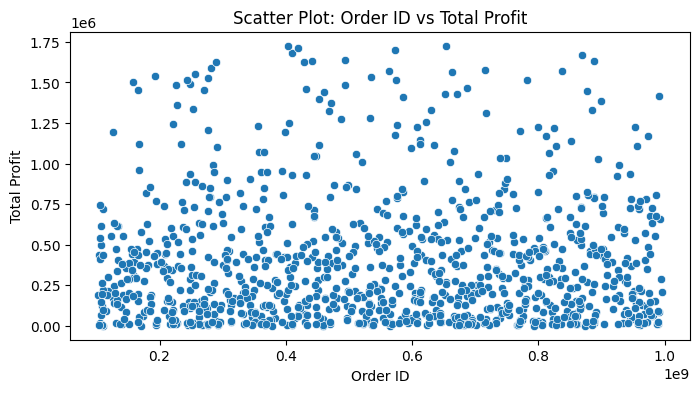

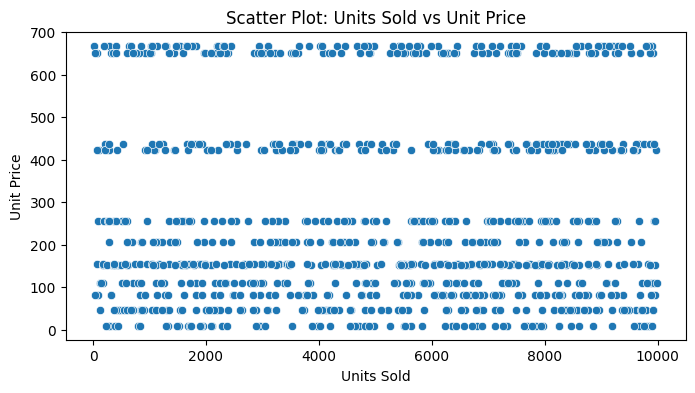

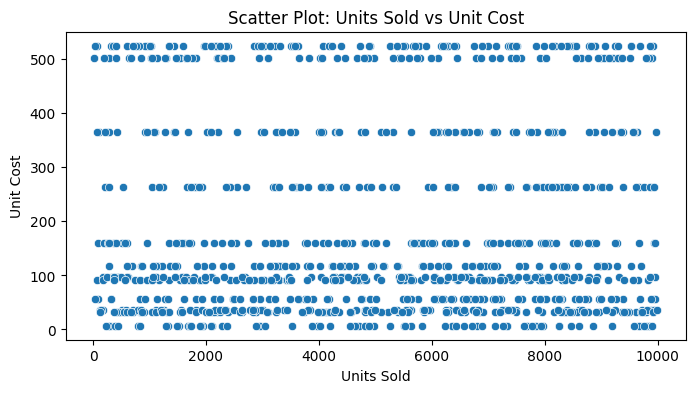

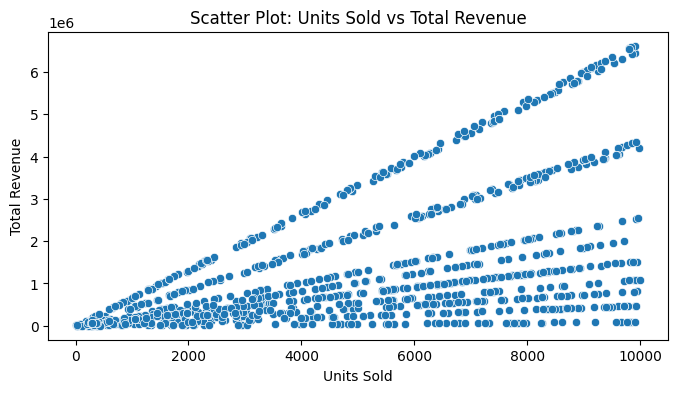

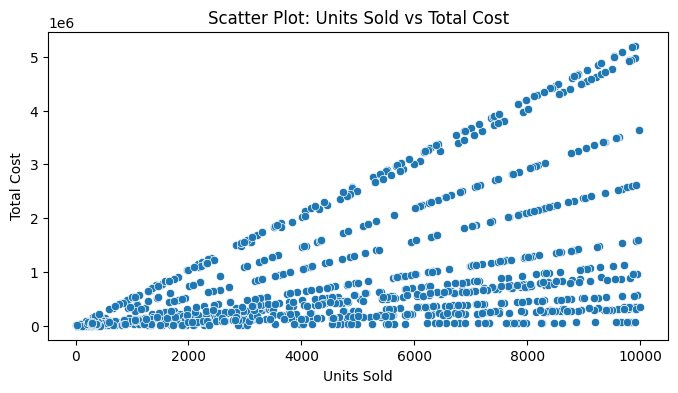

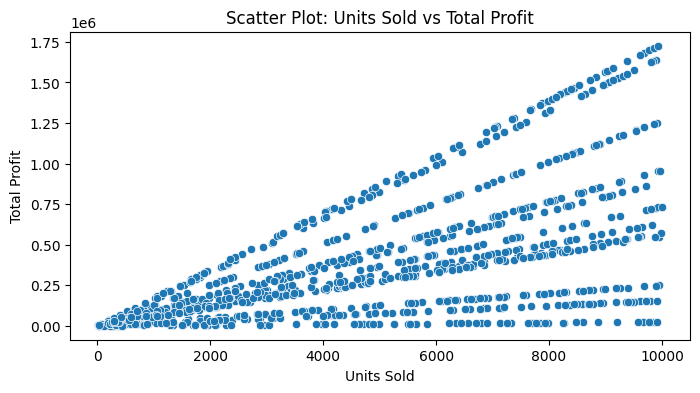

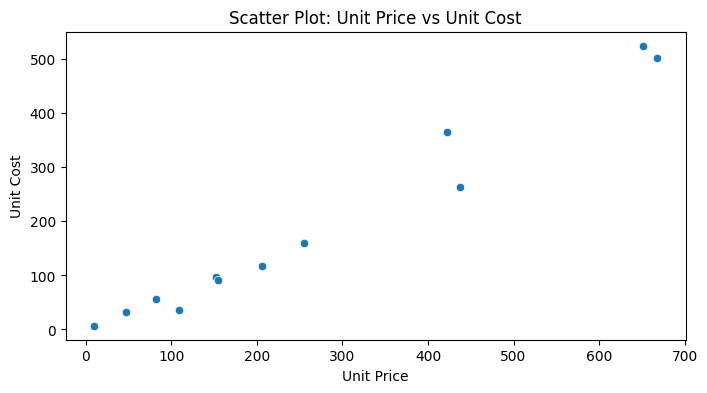

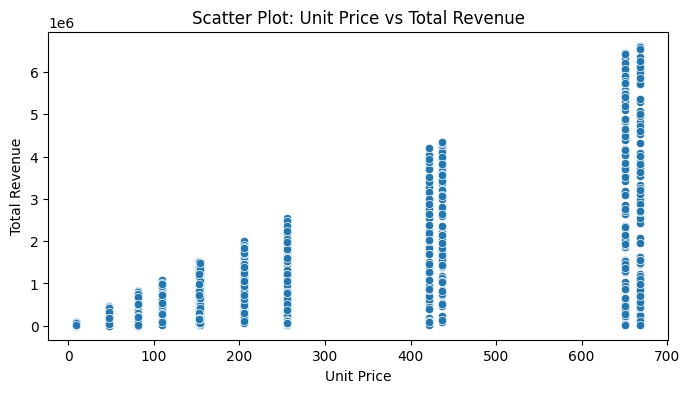

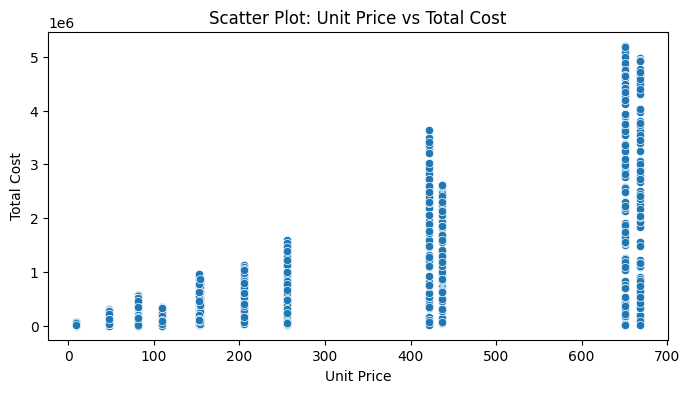

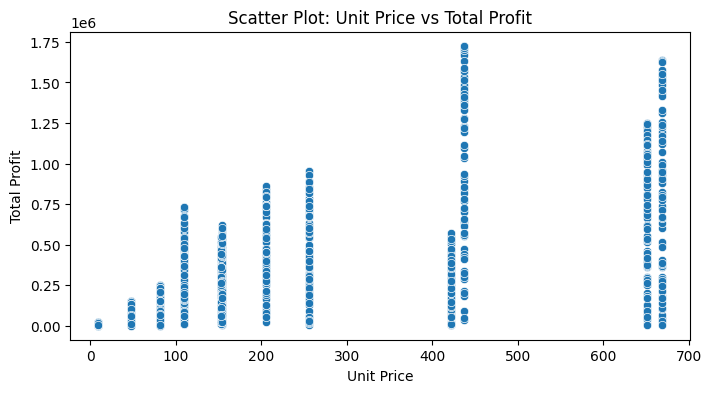

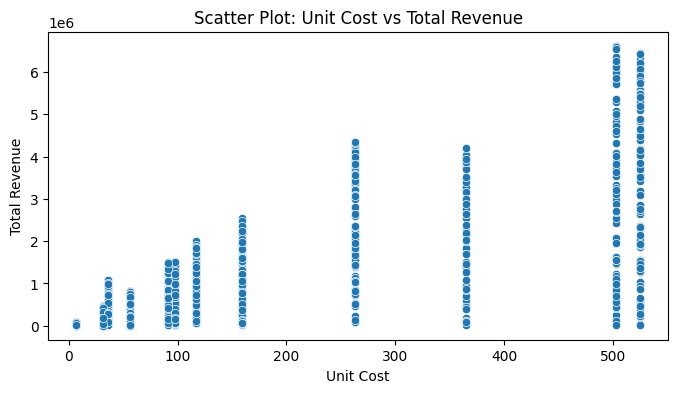

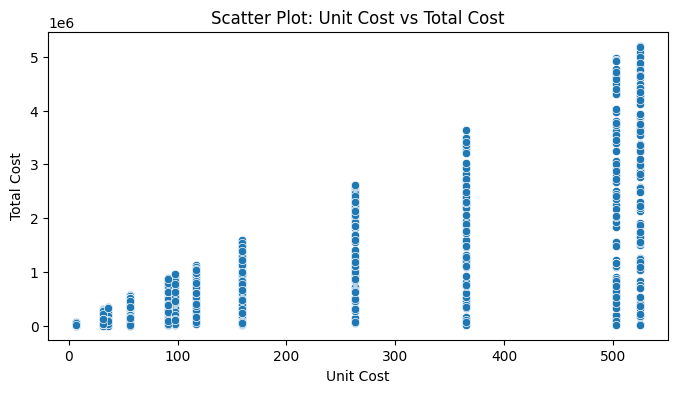

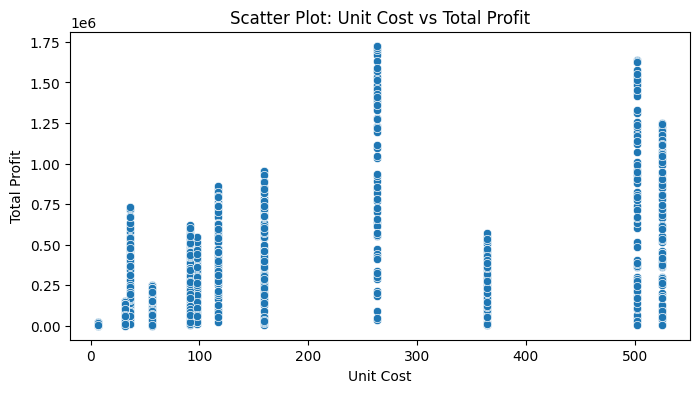

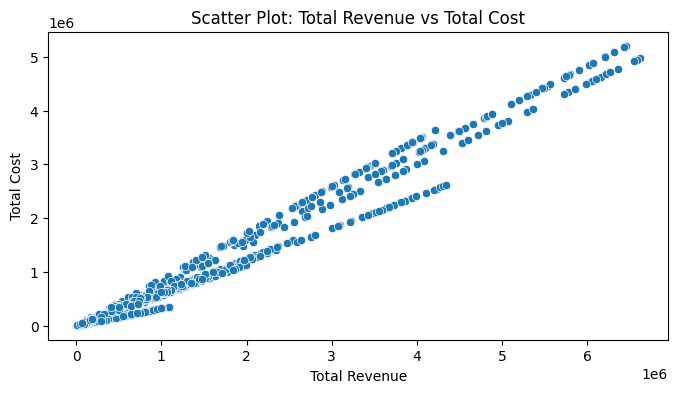

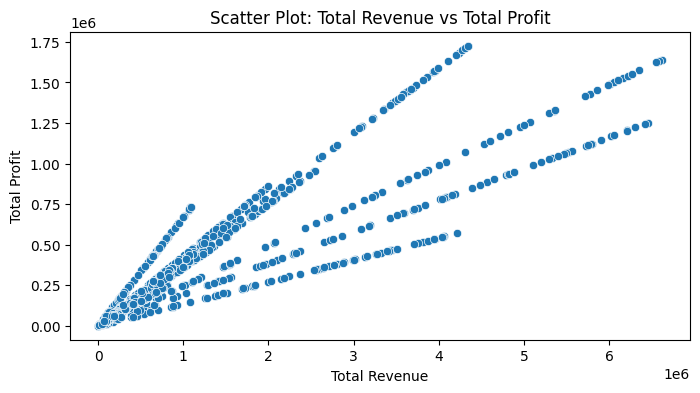

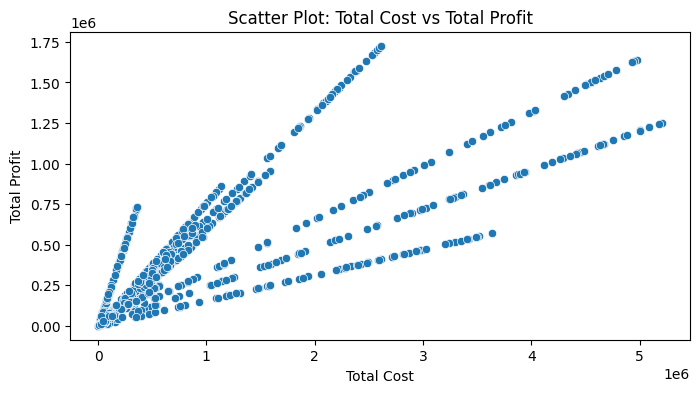

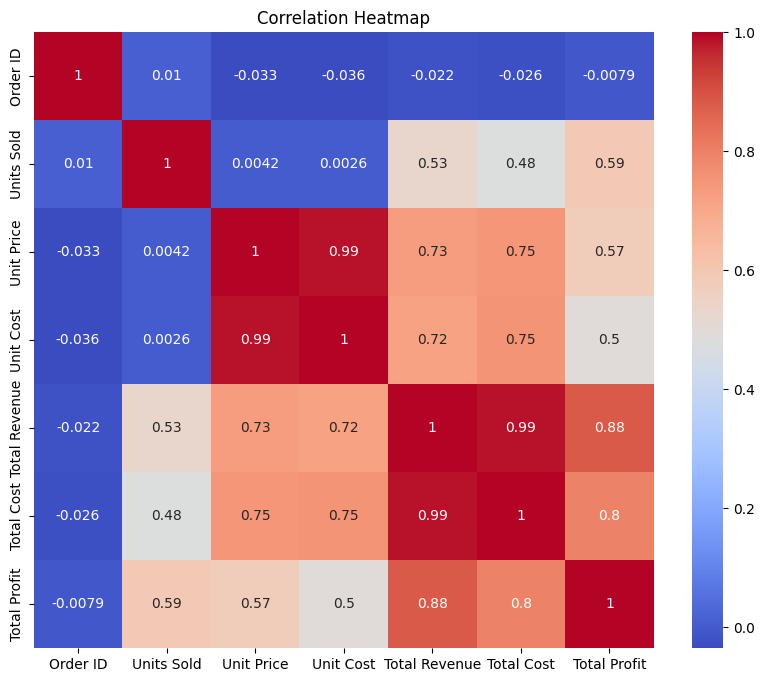

In [19]:
# Step 6: Univariate, Bivariate, and Multivariate Analysis
# Univariate Analysis: Histograms for numerical columns
df.hist(figsize=(12, 10))
plt.suptitle("Univariate Analysis: Histograms")
plt.show()

# Bivariate Analysis: Scatter plots for numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
for i in range(len(numerical_columns)):
    for j in range(i + 1, len(numerical_columns)):
        plt.figure(figsize=(8, 4))
        sns.scatterplot(data=df, x=numerical_columns[i], y=numerical_columns[j])
        plt.title(f"Scatter Plot: {numerical_columns[i]} vs {numerical_columns[j]}")
        plt.show()

# Multivariate Analysis: Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_columns].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [37]:
# Convert cleaned date column to datetime
# Convert cleaned date column to datetime
df['order date'] = pd.to_datetime(df['order date'])

# Set the date column as the index
df = df.set_index('order date')



# Visualize Total Revenue over time
df['total_revenue'] = df['units sold'] * df['unit price']
df['total_revenue'].plot(figsize=(12, 6), title="Total Revenue Over Time")
plt.xlabel("Order Date")
plt.ylabel("Total Revenue")
plt.show()

# Group by month and calculate mean revenue
monthly_revenue = df['total_revenue'].resample('ME').mean()
monthly_revenue.plot(figsize=(12, 6), title="Monthly Average Revenue")
plt.xlabel("Month")
plt.ylabel("Average Revenue")
plt.show()

# Resample to quarterly frequency
quarterly_revenue = df['total_revenue'].resample('QE').sum()
quarterly_revenue.plot(figsize=(12, 6), title="Quarterly Total Revenue")
plt.xlabel("Quarter")
plt.ylabel("Total Revenue")
plt.show()

KeyError: 'order date'